<a href="https://colab.research.google.com/github/IonaSantana/Artificial-Intelligence/blob/main/Flight_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fligh-Delay, qual compania eu devo ir?
O que é um atraso?
E quanto um atraso pode ser tolerado?

Quais voos atrasam mais?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn #correlacionar


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
airline = pd.read_csv("/content/drive/MyDrive/Flight Delays and Cancellations/airlines.csv")
airports = pd.read_csv("/content/drive/MyDrive/Flight Delays and Cancellations/airports.csv")
flights = pd.read_csv("/content/drive/MyDrive/Flight Delays and Cancellations/flights.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Funções

Coeficiente de Pearson -1 a 1, quanto mais próximo de um desse valores, maior a correlação 

Links: 

https://medium.com/omixdata/estat%C3%ADstica-an%C3%A1lise-de-correla%C3%A7%C3%A3o-usando-python-e-r-d68611511b5a

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [5]:
def pearson(data):
  correlacao = data.corr()
  mask = np.zeros_like(correlacao)
  mask[np.triu_indices_from(mask)] = True
  with sn.axes_style("white"):
      f, ax = plt.subplots(figsize=(10, 7))
  plot = sn.heatmap(correlacao, mask = mask,annot = True, fmt = ".1f", linewidths = .6)

Correlação entre duas variáveis

In [6]:
def plot_correlacao(x, y, text_x, text_y):
  plt.scatter(x, y,  color='blue')
  plt.xlabel(text_x) 
  plt.ylabel(text_y)
  plt.show()

### Explorar os dados

In [7]:
airline.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [8]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [9]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [11]:
flights.shape #5819079 de informações em 31 colunas

(5819079, 31)

Antes de retirar os valores nulos

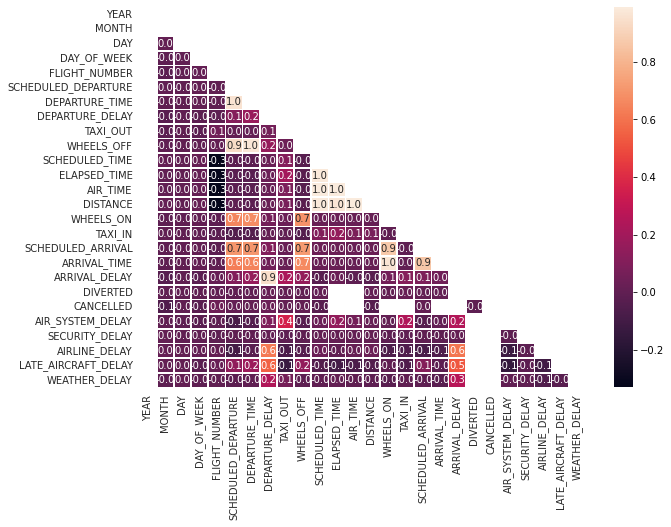

In [12]:
pearson(flights)

In [13]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [14]:
flights = flights.drop(['CANCELLATION_REASON', ], axis=1)

In [15]:
teste_flights = flights
flights = flights.dropna()

Após retirar os valores nulos

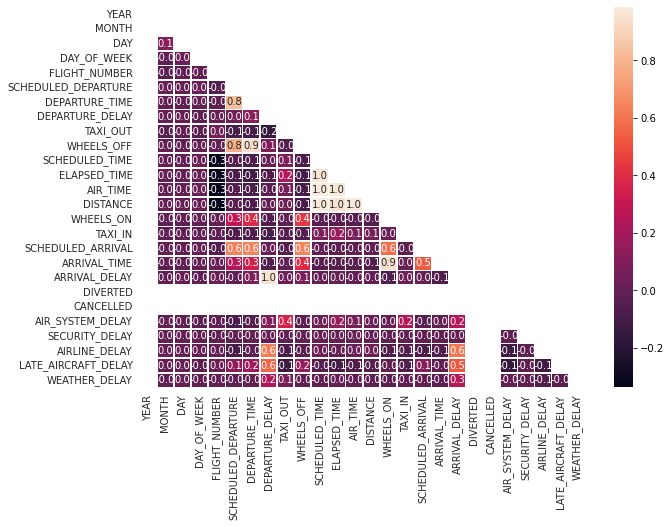

In [16]:
pearson(flights)

Retirar as colunas com menos de +-0.6 de correlação

In [17]:
teste_flights1 = teste_flights

In [18]:
teste_flights = teste_flights1.drop(['YEAR','MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER','TAIL_NUMBER','DIVERTED','CANCELLED','SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'TAXI_OUT', 'TAXI_IN', 'AIR_SYSTEM_DELAY'], axis=1)

In [19]:
teste_flights.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],
      dtype='object')

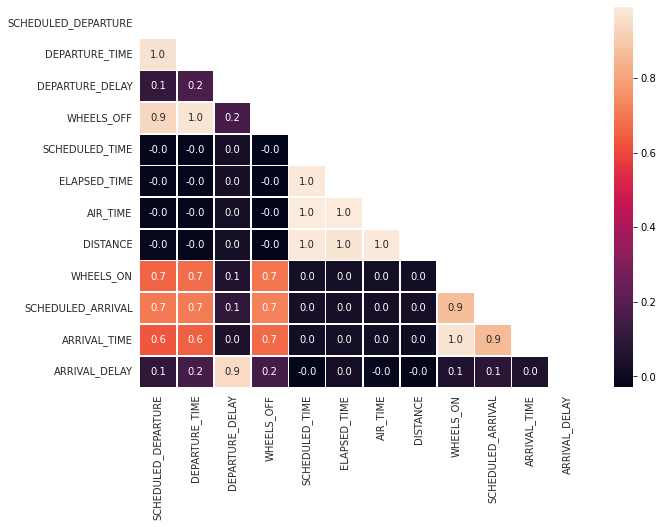

In [20]:
pearson(teste_flights)

In [21]:
columns_corr = teste_flights.columns

In [22]:
flights_time = flights[columns_corr]
flights_time.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],
      dtype='object')

In [23]:
flights_time.shape

(1063439, 15)

In [24]:
flights_time.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
27,NK,MSP,FLL,115,127.0,12.0,141.0,207.0,220.0,166.0,1487,527.0,542,607.0,25.0
30,NK,PHX,ORD,125,237.0,72.0,246.0,204.0,175.0,156.0,1440,622.0,549,632.0,43.0
35,HA,LAS,HNL,145,145.0,0.0,201.0,370.0,385.0,361.0,2762,602.0,555,610.0,15.0
50,B6,BQN,MCO,307,304.0,-3.0,329.0,173.0,196.0,160.0,1129,509.0,500,520.0,20.0
52,B6,SJU,MCO,400,535.0,95.0,544.0,185.0,175.0,163.0,1189,727.0,605,730.0,85.0


In [25]:
flights_time.shape

(1063439, 15)

In [26]:
flights_time.sort_values(['DEPARTURE_DELAY'], ascending=False).head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
337720,AA,BHM,DFW,700,1608.0,1988.0,1621.0,134.0,117.0,99.0,597,1800.0,914,1805.0,1971.0
3412085,AA,RIC,DFW,709,1427.0,1878.0,1455.0,185.0,205.0,156.0,1158,1631.0,914,1652.0,1898.0
4103531,AA,SAN,DFW,700,1050.0,1670.0,1116.0,179.0,174.0,142.0,1171,1538.0,1159,1544.0,1665.0
5810811,AA,ABQ,DFW,1041,1410.0,1649.0,1422.0,104.0,91.0,69.0,569,1631.0,1325,1641.0,1636.0
5279939,AA,DTW,ORD,1027,1338.0,1631.0,1352.0,82.0,89.0,56.0,235,1348.0,1049,1407.0,1638.0


In [27]:
flights_time = flights_time.sort_values(['DEPARTURE_DELAY'], ascending=True)


In [28]:
flights_time.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
3035017,F9,SEA,DEN,1945,1913.0,-32.0,1955.0,150.0,220.0,132.0,1024,2307.0,2315,2353.0,38.0
5663231,AA,STX,MIA,1815,1744.0,-31.0,1801.0,183.0,230.0,160.0,1139,1941.0,2018,2034.0,16.0
3858620,EV,EWN,ATL,600,530.0,-30.0,558.0,86.0,140.0,106.0,433,744.0,726,750.0,24.0
3645296,EV,MEI,PIB,2046,2016.0,-30.0,2022.0,30.0,85.0,75.0,69,2137.0,2116,2141.0,25.0
5357535,OO,PSC,MSP,710,640.0,-30.0,749.0,185.0,234.0,161.0,1254,1230.0,1215,1234.0,19.0


Opções de modelos: regressão linear (mostrar o atraso de cada companhia), árvores de decisão (companhia boa ou não), SVM - separar o valores de atraso positivo dos negativos?

Opções:
*melhores companhias para viajar
*melhores companhias para uma determinada linha (aeroporto de destino)
*separar por mês de cada companhia
*separar por ano de cada companhia
*separar por ano de cada companhia e por linha
*cluster de melhores companhias

## **Regressão** **Linear**

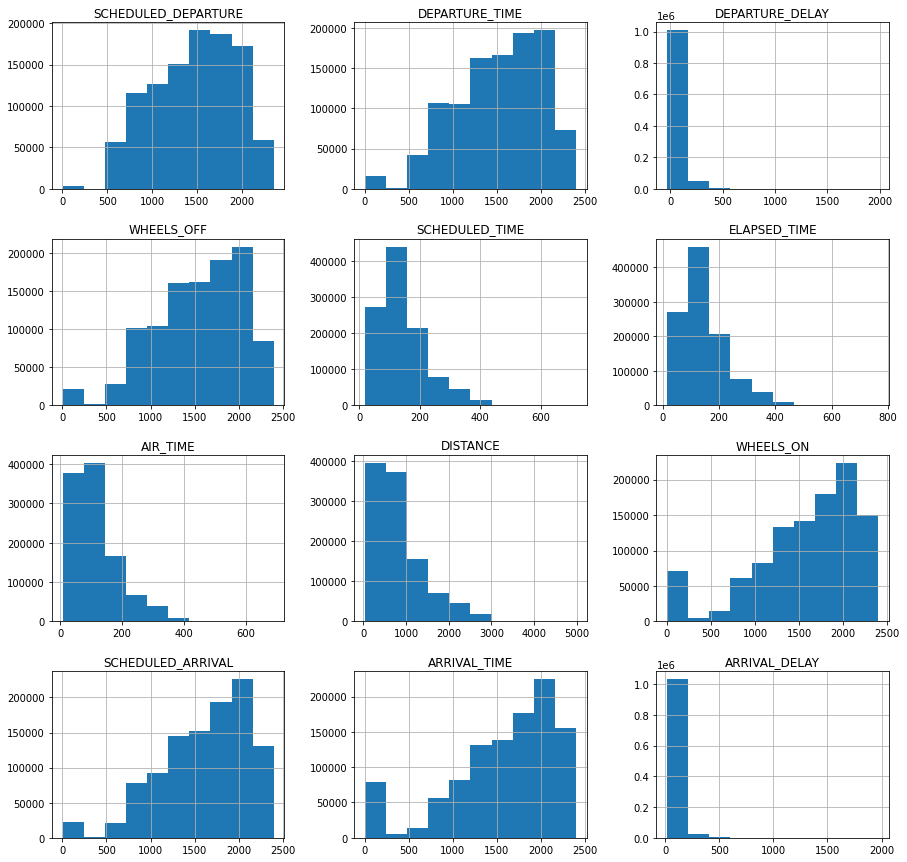

In [29]:
flights_time.hist(figsize=[15,15])
plt.show()

In [31]:
flights_time.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],
      dtype='object')

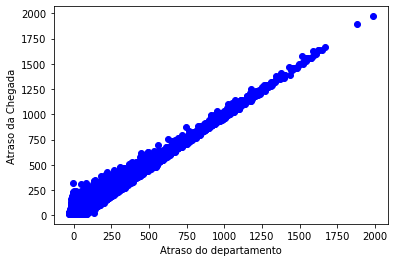

In [32]:
plot_correlacao(flights_time.DEPARTURE_DELAY, flights_time.ARRIVAL_DELAY, 'Atraso do departamento', 'Atraso da Chegada')

Sei que o atraso do departamento atrasa a chegada, mas o que causa o atraso do departamento?

### Quais companhias possuem maior atraso no departamento?

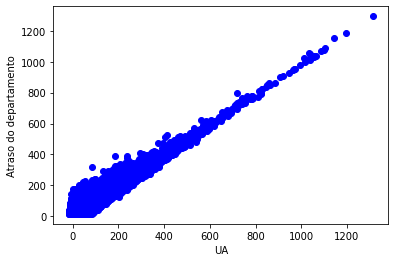

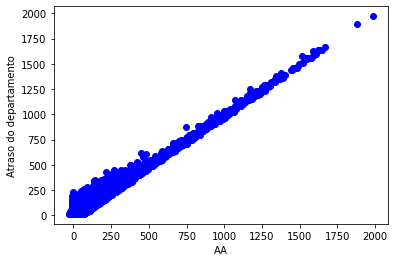

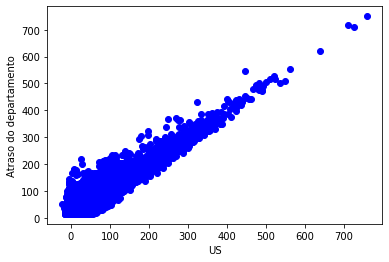

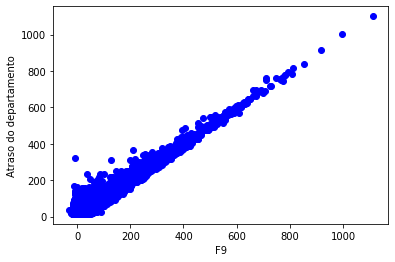

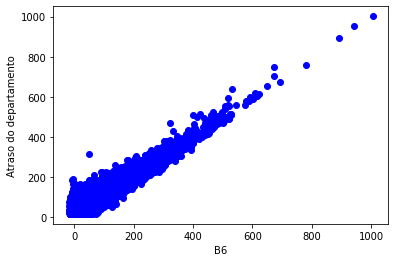

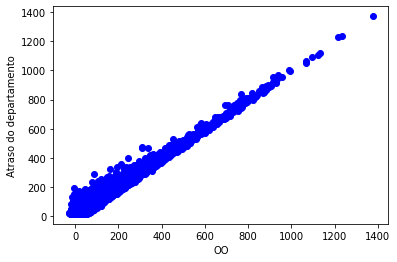

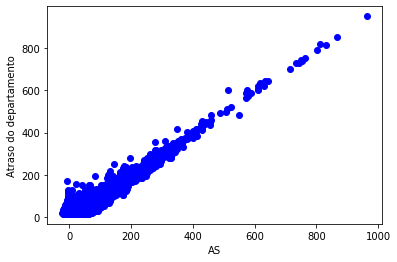

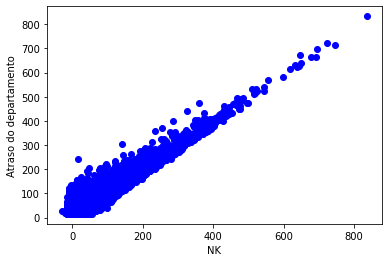

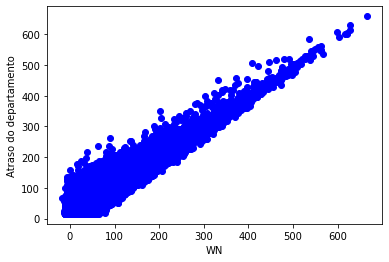

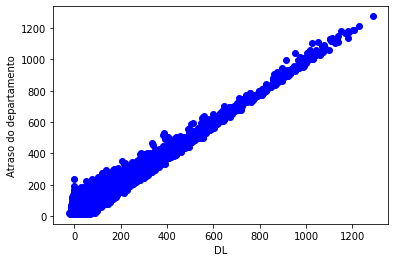

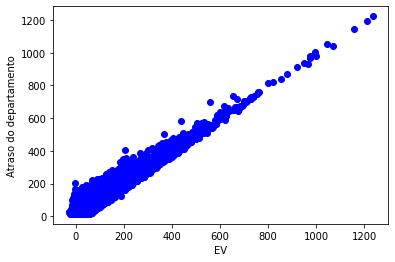

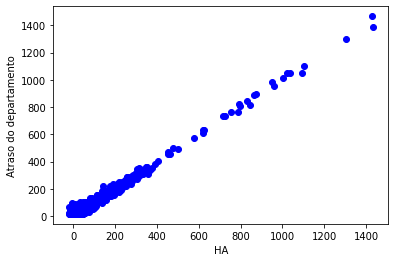

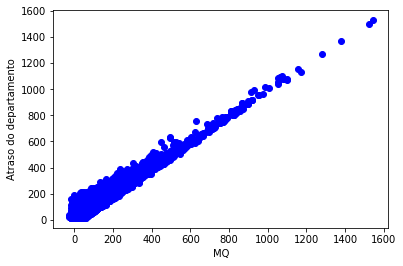

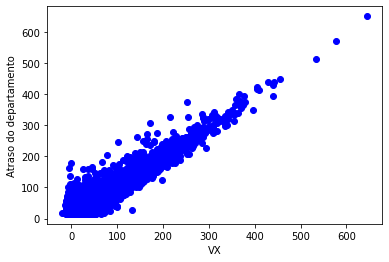

In [36]:
for companhia in airline['IATA_CODE']:
  companhia_plot = flights_time[flights_time['AIRLINE'] == companhia]
  plt.subplot()
  plot_correlacao(companhia_plot.DEPARTURE_DELAY, companhia_plot.ARRIVAL_DELAY, companhia, 'Atraso do departamento')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


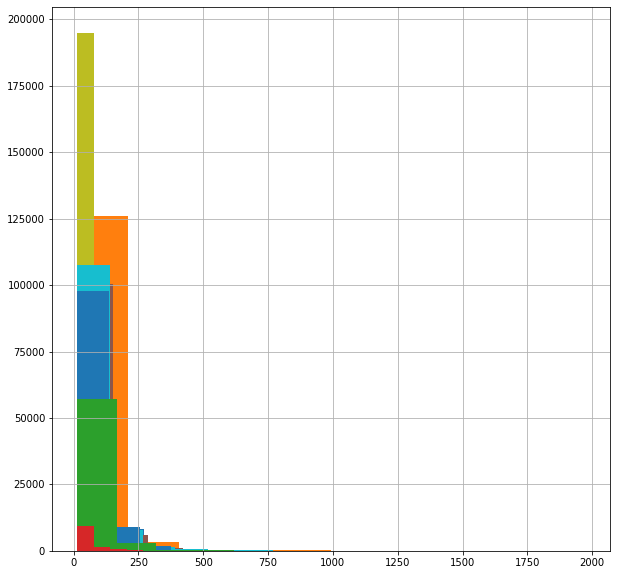

In [37]:
for companhia in airline['IATA_CODE']:
  companhia_plot = flights_time[flights_time['AIRLINE'] == companhia]
  plt.subplot()
  companhia_plot['ARRIVAL_DELAY'].hist(figsize=[10,10])
plt.show()